# <u>SALES DATA ANALYSIS:</u>

##### SALES DATA IS CONTAINED IN 12 SEPARATE CSV FILES. 
##### Data Description:
     * Order ID
     * Product
     * Quantity Ordered
     * Price Each
     * Order Date
     * Purchase Address

##### This project attempts to provide insight into the sales data and answer the following questions:
     - What was the best month for sales? How much was earned that month?
     - What city sold the most products?
     - What time should the advertisements be displayed to maximize the likelihood of customer’s buying product?
     - What products are most often sold together?
     - What products are sold the most? 

In [245]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [121]:
data = pd.read_csv('./Sales_April_2019.csv')

In [122]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### The data is contained in 12 separate csv files. The data needs to be concatenated into a single file for further analysis.

In [123]:
import os
import glob

In [124]:
os.chdir('../Sales_Data/')

In [125]:
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]

In [126]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

In [127]:
combined_csv.to_csv("combined.csv", index= False)

In [128]:
combined_data = pd.read_csv('./combined.csv')

In [129]:
combined_data.head()             ## This is the combined sales dataset

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [130]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning the dataset

In [132]:
combined_data.isnull().sum()/len(combined_data)

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [133]:
nan_df = combined_data[combined_data.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# REMOVING THE NULL VALUES

combined_data = combined_data.dropna(how = 'all')

In [135]:
combined_data.isnull().sum()/len(combined_data)  # NO NULL VALUES LEFT

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

#### Removing 'OR'(duplicate rows) from dataframe

In [137]:
combined_data  = combined_data[combined_data['Order Date'].str[0:2] != 'Or']

In [138]:
## Converting String Data into Numeric Data

In [139]:
combined_data['Quantity Ordered'] = pd.to_numeric(combined_data['Quantity Ordered'])
combined_data['Price Each'] = pd.to_numeric(combined_data['Price Each'])

In [140]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


#### ADDING A MONTH COLUMN

In [142]:
combined_data['Month'] = combined_data['Order Date'].str[0:2]
combined_data['Month'] = pd.to_numeric(combined_data['Month'])

In [143]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### ADDING TOTAL SALES COLUMN ( Quantity Ordered * Price Each)

In [145]:
combined_data['Sales'] = combined_data['Price Each']*combined_data['Quantity Ordered']

In [146]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [147]:
combined_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

## QUESTION : WHICH MONTH HAD MOST SALES?

In [156]:
month_sales = combined_data.groupby('Month')
month_sales.sum().sort_values(by = ['Sales'])

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
9,13109,2.084992e+06,2.097560e+06
2,13449,2.188885e+06,2.202022e+06
8,13448,2.230345e+06,2.244468e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
3,17005,2.791208e+06,2.807100e+06
5,18667,3.135125e+06,3.152607e+06
11,19798,3.180601e+06,3.199603e+06


Text(0.5, 0, 'Month Numbers')

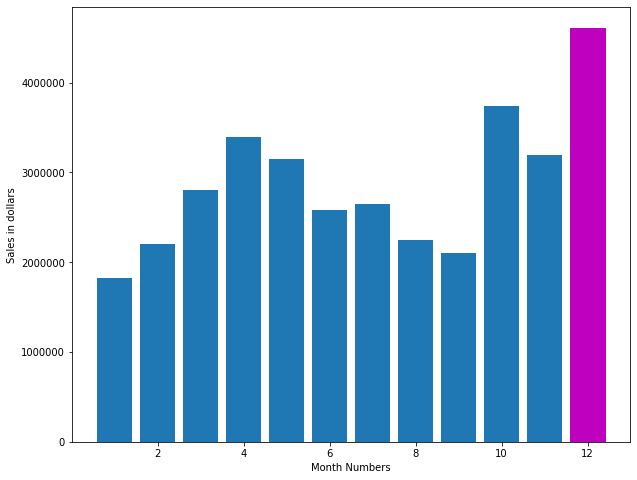

In [178]:
plt.figure(figsize = (10,8))
months = range(1,13)

bar = plt.bar(months, month_sales.sum()['Sales'])
bar[-1].set_color('m')
plt.xticks = months
plt.ylabel('Sales in dollars')
plt.xlabel('Month Numbers')

#### FROM THE DATA AND THE BAR CHART IT IS EVIDENT THAT THE MONTH OF DECEMBER(12) HAD THE MOST SALES

## QUESTION: WHICH CITY HAD THE MOST SALES?

In [200]:
combined_data['City'] = combined_data['Purchase Address'].apply(lambda x : x.split(',')[1] + " " + x.split(',')[2].split()[0])

In [201]:
combined_data.head()  ## ADDING A CITY COLUMN

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [233]:
city_sales = combined_data.groupby('City').sum()
city_sales.sort_values(by = 'Sales')

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Portland OR,11303,1.860558e+06,70621,1.870732e+06
Seattle WA,16553,2.733296e+06,104941,2.747755e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06


Text(0.5, 0, 'Cities')

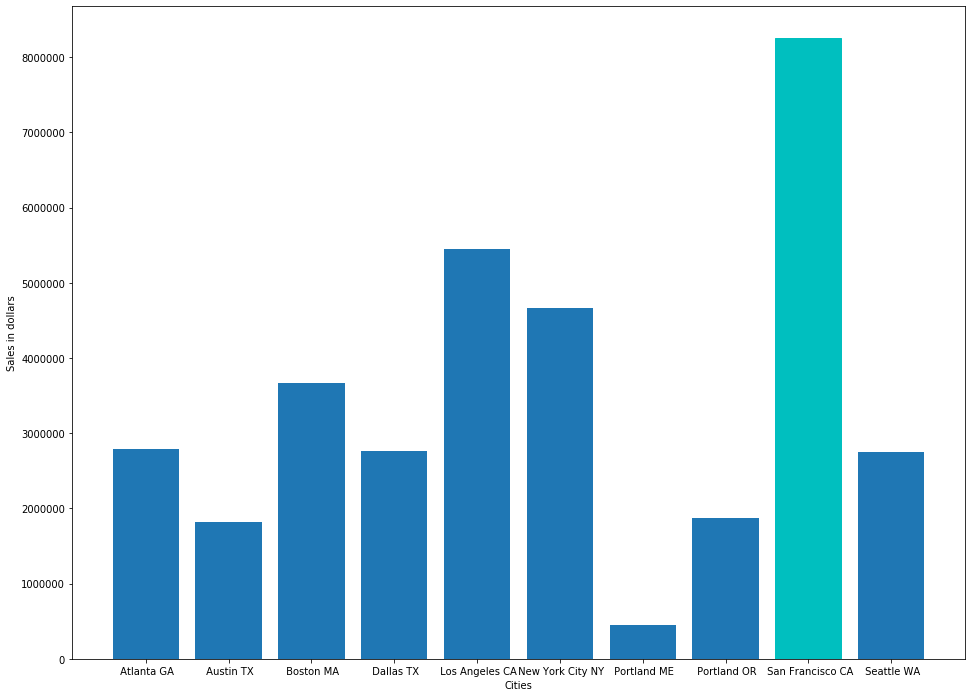

In [249]:
plt.figure(figsize = (16,12))
cities = [city for city,df in combined_data.groupby('City')]
ind = np.arange(len(cities))
bar = plt.bar(cities, city_sales['Sales'])
bar[-2].set_color('c')
plt.ylabel('Sales in dollars')
plt.xlabel('Cities')

#### FROM THE DATA AND THE BAR CHART IT CAN BE SEEN THAT SAN FRANCISCO CA HAD THE MOST SALES OUT OF ALL THE CITIES

## QUESTION: WHAT TIME SHOULD ADVERTISEMENTS BE DISPLAYED TO MAXIMISE THE LIKELIHOOD OF PURCHASE OF A PRODUCT?

In [251]:
combined_data['Order Date'] = pd.to_datetime(combined_data['Order Date'])
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [252]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 19.2+ MB


In [254]:
combined_data['Hour'] = combined_data['Order Date'].dt.hour
combined_data['Minute'] = combined_data['Order Date'].dt.minute
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


Text(0, 0.5, 'Number Of Orders')

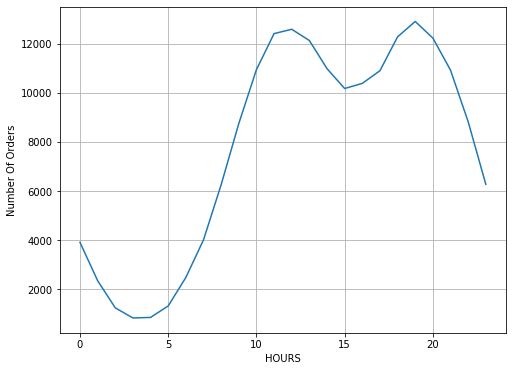

In [275]:
hours = [hour for hour,_ in combined_data.groupby('Hour')]
plt.figure(figsize=(8,6))
plt.plot(hours ,combined_data.groupby('Hour').count()['Quantity Ordered'])
plt.grid()
plt.xlabel('HOURS')
plt.ylabel('Number Of Orders')

#### FROM THE LINE GRAPH IT CAN BE SEEN THAT ADVERTISEMENTS AT  AROUND 12:00PM AND AROUND 7PM MAXIMISED THE AMOUNT OF SALES OF PRODUCTS

## QUESTION: WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER?

In [277]:
df = combined_data[combined_data['Order ID'].duplicated(keep = False)]

In [278]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31


In [281]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\sadhy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [282]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [284]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### THE ABOVE ITEMS ARE THE TOP 10 IN THE LIST OF 'ITEMS MOST OFTEN SOLD TOGETHER'

## QUESTION: WHICH PRODUCT HAD THE MOST SALES?

In [285]:
product_group = combined_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

In [288]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Text(0.5, 0, 'QUANTITY ORDERD')

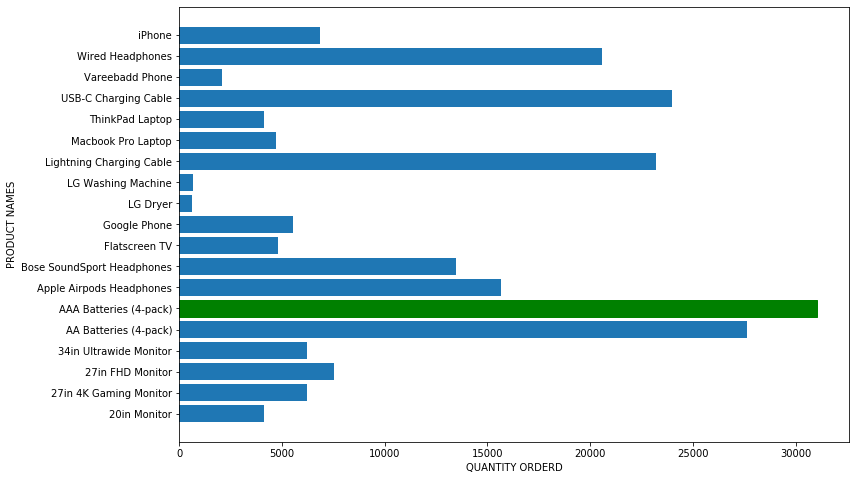

In [296]:
p = [p for p,_ in product_group]

plt.figure(figsize=(12,8))
bar = plt.barh(p , quantity_ordered)
bar[5].set_color('g')
plt.ylabel("PRODUCT NAMES")
plt.xlabel('QUANTITY ORDERD')

#### FROM THE ABOVE BAR CHART IT IS EVIDENT THAT AAA BATTERIES (4 - PACK) WAS THE MOST SOLD PRODUCT.

# THE END